In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [106]:
def clamp(value, min, max):
    if value < min:
        return min
    if value > max:
        return max
    return value

def random_move():
    return 40.0

def move_to_base(distance_to_closest_ally, distance_to_base):
    return 10.0 * max(0.0, clamp(distance_to_closest_ally, 0.0, 5.0) + clamp(distance_to_base, 0.0, 5.0))

def attack_enemy(distance_to_closest_enemy, distance_to_base):
    return max(0.0, 50.0 + 25.0 * (7.0 - distance_to_closest_enemy) - np.exp(distance_to_base - 2.0) / 10.0)

In [107]:
size = 150

distance_to_base_grid          = np.linspace(0.0, 15.0, num=size)
distance_to_closest_ally_grid  = np.linspace(0.0, 15.0, num=size)
distance_to_closest_enemy_grid = np.linspace(0.0, 15.0, num=size)

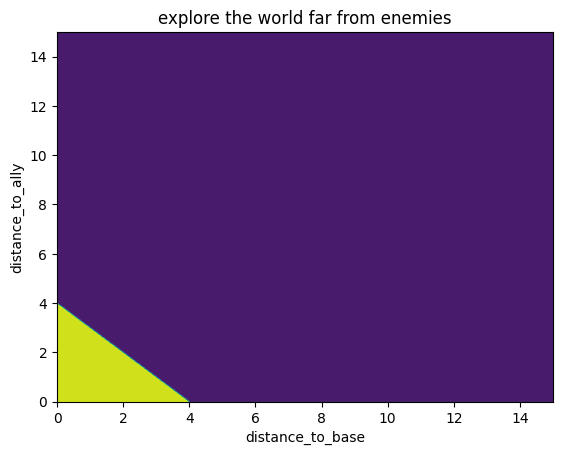

In [108]:
image = np.zeros((size, size))
for i, distance_to_base in enumerate(distance_to_base_grid):
    for j, distance_to_closest_ally in enumerate(distance_to_closest_ally_grid):
        if move_to_base(distance_to_closest_ally, distance_to_base) < random_move():
            image[i][j] = 1.0

distance_to_base_mesh, distance_to_closest_ally_mesh = np.meshgrid(distance_to_base_grid, distance_to_closest_ally_grid)

plt.contourf(distance_to_base_mesh, distance_to_closest_ally_mesh, image)
plt.title('explore the world far from enemies')
plt.xlabel('distance_to_base')
plt.ylabel('distance_to_ally')

plt.show()

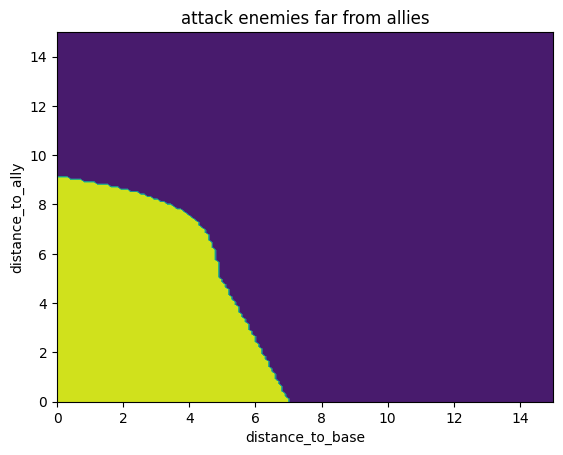

In [109]:
image = np.zeros((size, size))
for i, distance_to_base in enumerate(distance_to_base_grid):
    for j, distance_to_closest_enemy in enumerate(distance_to_closest_enemy_grid):
        if move_to_base(10, distance_to_base) < attack_enemy(distance_to_closest_enemy, distance_to_base):
            image[i][j] = 1.0

distance_to_base_mesh, distance_to_closest_enemy_mesh = np.meshgrid(distance_to_base_grid, distance_to_closest_enemy_grid)

plt.contourf(distance_to_base_mesh, distance_to_closest_enemy_mesh, image)
plt.title('attack enemies far from allies')
plt.xlabel('distance_to_base')
plt.ylabel('distance_to_ally')

plt.show()